importing dependencies


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics 

Data collection analysis

In [20]:

file_path = r'C:\Users\MCC\Downloads\ML\Train.csv'
big_mart_data = pd.read_csv(file_path)

In [21]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [22]:
#rows are data points and colums are fearures
big_mart_data.shape

(8523, 12)

In [24]:
#geting some information
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Catagorical Features
>Item_Identifier              
>Item_Fat_Content         
>Item_Type               
>Outlet_Identifier              
>Outlet_Size              
>Outlet_Location_Type             
           >Outlet_Type                

In [27]:
#checking for missing values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

handeling missing values
>mean --avg value
>
>mode --most repeated values              

In [32]:
#mean value of Item_Weight                  
big_mart_data['Item_Weight'].mean()

12.857645184135976

In [34]:
#filling the missing values with mean
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean() , inplace = True)

In [36]:
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Replacing the missing values in Outlet_Size with mode


In [38]:
mode_of_Outlet_Size = big_mart_data.pivot_table(values='Outlet_Size',columns = 'Outlet_Type', aggfunc=(lambda x : x.mode()[0]))

In [40]:
mode_of_Outlet_Size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [41]:
missing_values = big_mart_data['Outlet_Size'].isnull()

In [42]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [43]:
big_mart_data.loc[missing_values,'Outlet_Size'] = big_mart_data.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_Size)

In [45]:
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Data Analysis

In [46]:
#statical measures abt the data
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [47]:
sns.set()

C:\Users\MCC\AppData\Local\Temp\ipykernel_5528\1776268852.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Weight'])
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


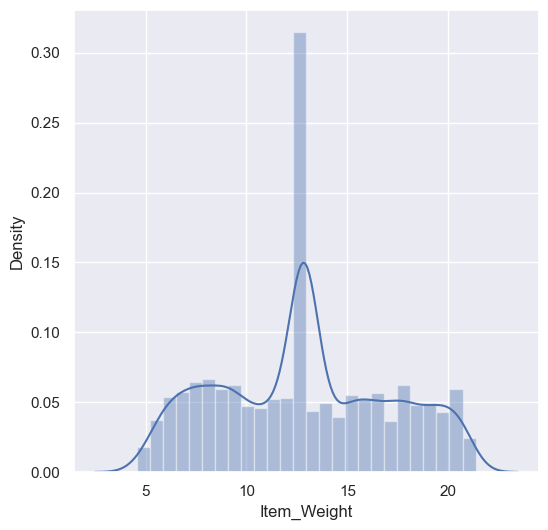

In [49]:
#plot for Item_Weight 
plt.figure(figsize = (6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

C:\Users\MCC\AppData\Local\Temp\ipykernel_5528\1473679385.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Visibility'])
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


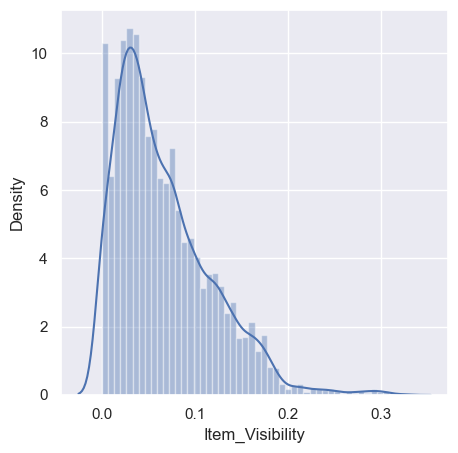

In [61]:
plt.figure(figsize=(5,5))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

C:\Users\MCC\AppData\Local\Temp\ipykernel_5528\1978007335.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_MRP'])
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


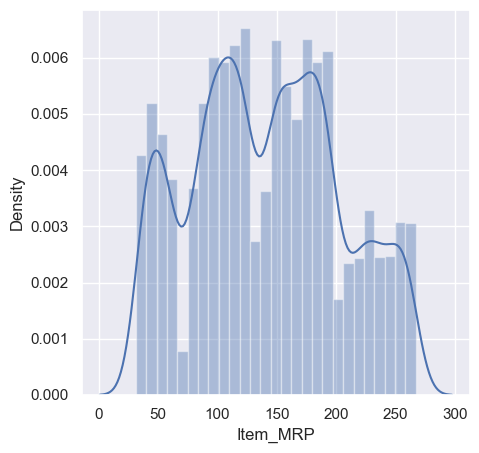

In [62]:
plt.figure(figsize=(5,5))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

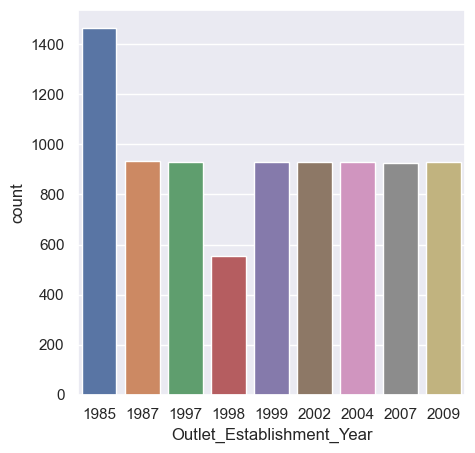

In [60]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'Outlet_Establishment_Year', data = big_mart_data)
plt.show()

C:\Users\MCC\AppData\Local\Temp\ipykernel_5528\2671318504.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Outlet_Sales'])
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


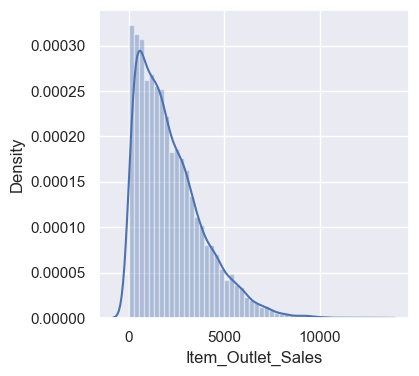

In [64]:
plt.figure(figsize=(4,4))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

Catagorical feature

In [65]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


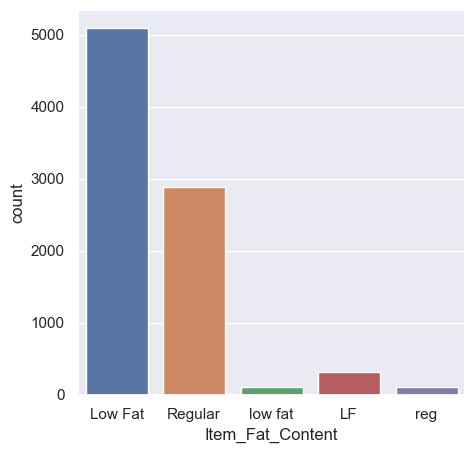

In [66]:
plt.figure(figsize = (5,5))
sns.countplot(x= 'Item_Fat_Content', data = big_mart_data)


plt.show()

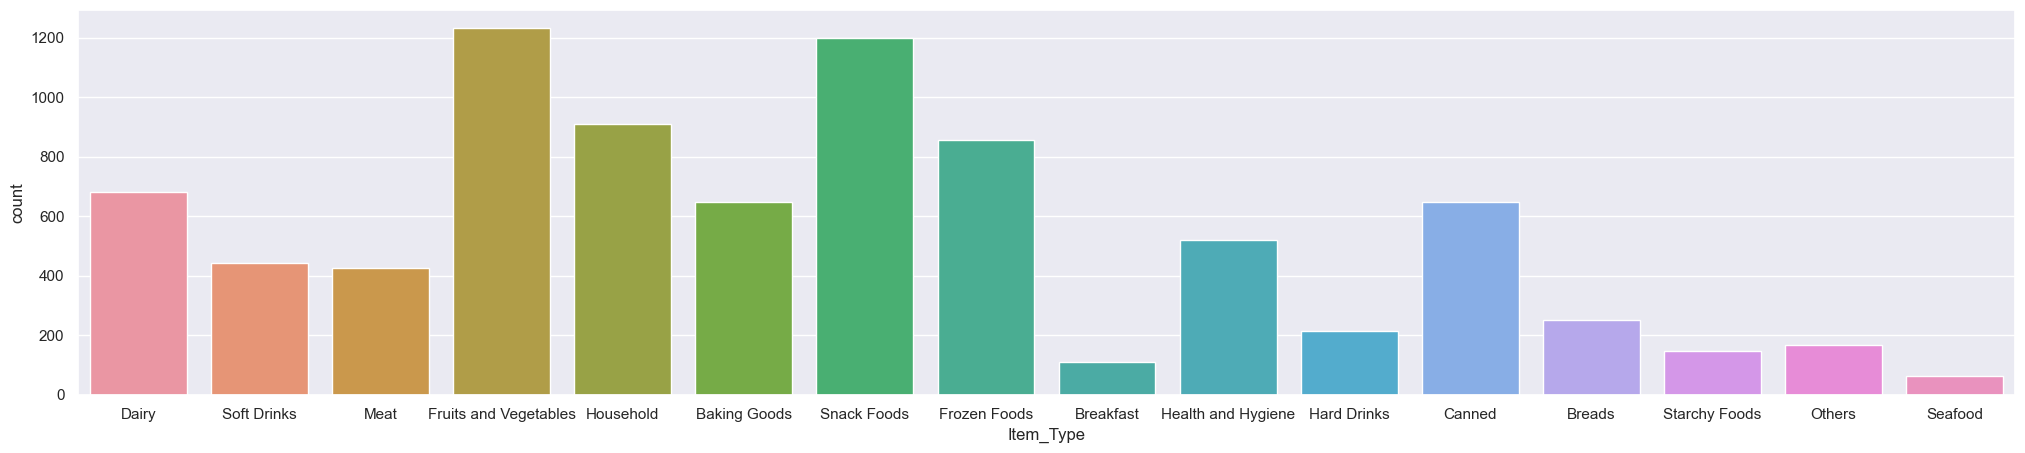

In [68]:
plt.figure(figsize = (25,5))
sns.countplot(x= 'Item_Type', data = big_mart_data)


plt.show()

In [74]:
plt.figure(figsize = (5,5))
sns.countplot(x= 'Outlet_Size', data = big_mart_data)
plt.show()

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 500x500 with 0 Axes>

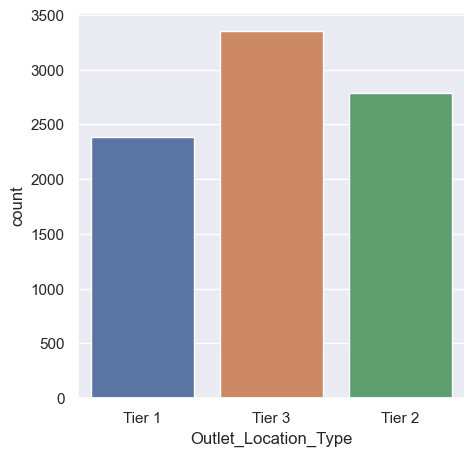

In [71]:
plt.figure(figsize = (5,5))
sns.countplot(x= 'Outlet_Location_Type', data = big_mart_data)


plt.show()

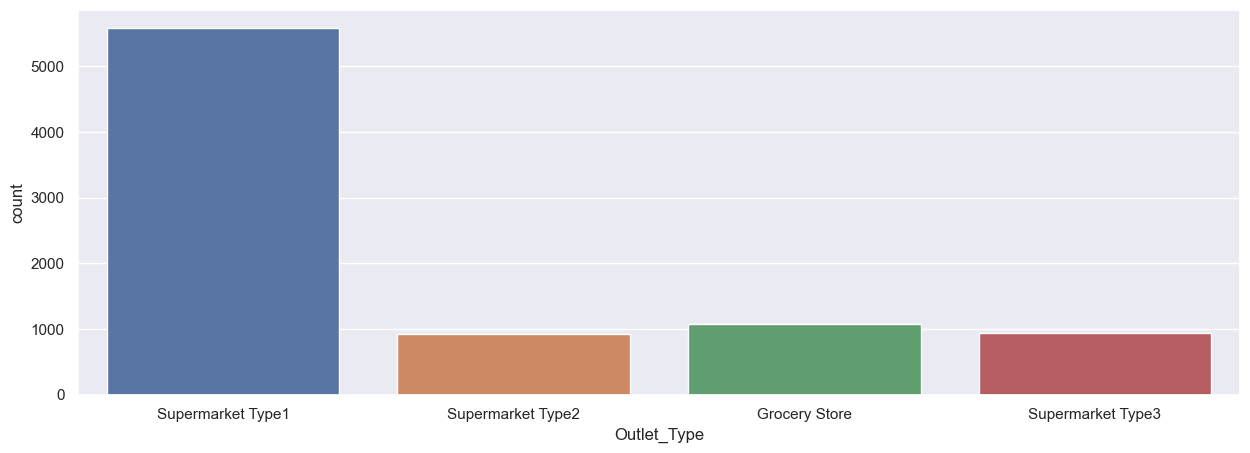

In [73]:
plt.figure(figsize = (15,5))
sns.countplot(x= 'Outlet_Type', data = big_mart_data)


plt.show()

In [75]:
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [76]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Data preprocessing

In [80]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [82]:
big_mart_data.replace({'Item_Fat_Content':{'low fat':'Low Fat' , 'LF':'Low Fat' , 'reg':'Regular'}} , inplace = True)

In [83]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

label encoding
Converting Catagorical into numerical values

In [85]:
encoder = LabelEncoder()

In [93]:
big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

In [95]:
big_mart_data['Item_Identifier '] = encoder.fit_transform(big_mart_data['Item_Identifier'])

In [96]:

big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])


In [97]:
big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])



In [98]:
big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])


In [110]:

big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])


In [100]:

big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [106]:
big_mart_data['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [105]:
big_mart_data['Outlet_Size'] = big_mart_data['Outlet_Size'].str.replace(r'\[Grocery Store\]', 'Grocery Store', regex=True)

In [112]:
big_mart_data['Outlet_Size'].isnull().sum()

0

In [111]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier
0,FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,156
1,DRC01,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,8
2,FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,662
3,FDX07,19.20,1,0.000000,6,182.0950,0,1998,3,2,0,732.3800,1121
4,NCD19,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,1297


Spliting targets and features

In [130]:
X = big_mart_data.drop(columns = 'Item_Outlet_Sales' ,axis=1)
Y = big_mart_data['Item_Outlet_Sales']

In [131]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Identifier
0,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,156
1,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,8
2,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,662
3,19.200,1,0.000000,6,182.0950,0,1998,3,2,0,1121
4,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,1297
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,370
8519,8.380,1,0.046982,0,108.1570,7,2002,3,1,1,897
8520,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1357
8521,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,681


In [132]:
Y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

spliting the data into training data and testing data

In [133]:
X_train , X_test , Y_train, Y_test = train_test_split(X , Y, test_size=0.2 ,random_state=2)

In [134]:
print(X.shape , X_train.shape , X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [135]:
print(Y.shape , Y_train.shape , Y_test.shape)


(8523,) (6818,) (1705,)


Machine Learinig Training
- XGBoost Regressor

In [136]:
regressor = XGBRegressor()

In [137]:
regressor.fit(X_train , Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

In [139]:
# prediction on training data 
training_data_prediction = regressor.predict(X_train)

In [141]:
# R squared value
r2_train = metrics.r2_score(Y_train , training_data_prediction)

In [142]:
print('R squared values = ',r2_train)

R squared values =  0.8773882689577641


In [143]:
# prediction on testing data 
testing_data_prediction = regressor.predict(X_test)

In [144]:
r2_test = metrics.r2_score(Y_test , testing_data_prediction)

In [145]:
print('R squared values = ',r2_test)

R squared values =  0.5124778555761009
